<a href="https://colab.research.google.com/github/pythonuzgit/elmurodov/blob/master/Deep%20learning%20with%20PyTorch/Hemnet_data_with_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import numpy as np
import pandas as pd
from pandas import DataFrame

import tensorflow as tf
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader
from torch.utils import data
from tqdm.notebook import tqdm

In [7]:
df_train = pd.read_csv('/content/hemnet_data_clean.csv')
df_train.drop(columns=['Unnamed: 0'],axis=1,inplace=True)
df_train.head()

,address,asked_price,coordinate,final_price,pourcentage_difference,land_area,area,commune,price_per_area,rooms,sale_date,supplemental_area
0,Markviksvägen 15,6475000.0,"[59.371685, 17.8250389]",6950000,7.0,635.0,117.0,"Hässelby Södra Villastad, Stockholms kommun",59402.0,5.0,Såld 2022-06-17,44.0
1,Mälarhöjdsvägen 38,9950000.0,"[59.3008766, 17.9478054]",11300000,14.0,882.0,195.0,"Mälarhöjden - Hägersten, Stockholms kommun",57949.0,5.0,Såld 2022-06-17,22.0
2,Häradsvägen 202,5795000.0,"[59.27202322587505, 17.954076342308372]",6200000,7.0,1224.0,90.0,"Segeltorp, Huddinge kommun",68889.0,6.0,Såld 2022-06-17,90.0
3,Hemmansvägen 18,11950000.0,"[59.28390406370304, 18.07625832074728]",12700000,6.0,542.0,110.0,"Gamla Enskede, Stockholms kommun",115455.0,5.0,Såld 2022-06-17,48.0
4,Alholmsbacken 8,7950000.0,"[59.28134, 17.9009438]",8100000,2.0,690.0,157.0,"Skärholmshöjden., Stockholms kommun",51592.0,6.0,Såld 2022-06-17,0.0


In [8]:
df_train.describe()

,asked_price,final_price,pourcentage_difference,land_area,area,price_per_area,rooms,supplemental_area
count,5.000000e+02,5.000000e+02,500.000000,495.000000,499.000000,499.000000,490.000000,500.000000
mean,9.375150e+06,1.004715e+07,8.914000,1012.278788,142.759519,79120.142285,6.165306,55.460000
std,3.911988e+06,4.014927e+06,8.797579,1508.117107,116.952734,29949.142598,2.292341,54.933193
min,1.475000e+06,1.490000e+06,0.000000,93.000000,21.000000,20617.000000,2.000000,0.000000
25%,6.995000e+06,7.450000e+06,1.000000,557.500000,102.500000,55239.000000,5.000000,22.000000
50%,8.475000e+06,8.852500e+06,7.000000,729.000000,134.000000,71635.000000,6.000000,54.000000
75%,1.012375e+07,1.130000e+07,14.000000,977.000000,162.000000,99537.000000,7.000000,79.000000
max,2.990000e+07,3.110000e+07,48.000000,13811.000000,1795.000000,187500.000000,45.000000,845.000000


In [10]:
num_cols = []

num_cols.extend(list(df_train.dtypes[df_train.dtypes == np.int64].index))
num_cols.extend(list(df_train.dtypes[df_train.dtypes == np.float64].index))

In [11]:
num_cols

['final_price',
 'asked_price',
 'pourcentage_difference',
 'land_area',
 'area',
 'price_per_area',
 'rooms',
 'supplemental_area']

In [12]:
num_cols.remove('final_price')
num_cols.append('final_price')

In [15]:
data = DataFrame(df_train, columns = num_cols)

In [16]:
data.describe()

,asked_price,pourcentage_difference,land_area,area,price_per_area,rooms,supplemental_area,final_price
count,5.000000e+02,500.000000,495.000000,499.000000,499.000000,490.000000,500.000000,5.000000e+02
mean,9.375150e+06,8.914000,1012.278788,142.759519,79120.142285,6.165306,55.460000,1.004715e+07
std,3.911988e+06,8.797579,1508.117107,116.952734,29949.142598,2.292341,54.933193,4.014927e+06
min,1.475000e+06,0.000000,93.000000,21.000000,20617.000000,2.000000,0.000000,1.490000e+06
25%,6.995000e+06,1.000000,557.500000,102.500000,55239.000000,5.000000,22.000000,7.450000e+06
50%,8.475000e+06,7.000000,729.000000,134.000000,71635.000000,6.000000,54.000000,8.852500e+06
75%,1.012375e+07,14.000000,977.000000,162.000000,99537.000000,7.000000,79.000000,1.130000e+07
max,2.990000e+07,48.000000,13811.000000,1795.000000,187500.000000,45.000000,845.000000,3.110000e+07


In [17]:
data_nan = np.any(pd.isna(data), axis = 0)
data_nan = list(data_nan[data_nan == True].index)

In [18]:
data_nan

['land_area', 'area', 'price_per_area', 'rooms']

In [22]:
data['land_area'] = data['land_area'].fillna(0)
data['area'] = data['area'].fillna(0)
data['price_per_area'] = data['price_per_area'].fillna(0)
data['rooms'] = data['rooms'].fillna(0) 

In [23]:
data_nan = np.any(pd.isna(data), axis = 0)
data_nan = list(data_nan[data_nan == True].index)

In [24]:
data_nan

[]

In [25]:
import torch
import torch.nn as nn

In [26]:
data_x_cols = list(data.columns)
data_x_cols.remove('final_price')
data_y_cols = ['final_price']

In [27]:
data_x_df = DataFrame(data, columns = data_x_cols)
data_y_df = DataFrame(data, columns = data_y_cols)

In [31]:
data_x = torch.tensor(data_x_df.values, dtype = torch.float)
data_y = torch.tensor(data_y_df.values, dtype = torch.float)

In [32]:
data_x.shape

torch.Size([500, 7])

In [33]:
data_y.shape

torch.Size([500, 1])

Model

In [34]:
class Net(nn.Module):
  def __init__(self, D_in, H1, H2, H3, D_out):

    super(Net, self).__init__()

    self.linear1 = nn.Linear(D_in, H1)
    self.linear2 = nn.Linear(H1, H2)
    self.linear3 = nn.Linear(H2, H3)
    self.linear4 = nn.Linear(H3, D_out)

  def forward(self, x):
    y_pred = self.linear1(x).clamp(min = 0)
    y_pred = self.linear2(y_pred).clamp(min = 0)
    y_pred = self.linear3(y_pred).clamp(min = 0)
    y_pred = self.linear4(y_pred)

    return y_pred  





In [35]:
H1, H2, H3 = 500, 1000, 200

In [36]:
D_in, D_out = data_x.shape[1], data_y.shape[1]

Normalize data

In [44]:
means, maxs, mins = dict(), dict(), dict()



In [45]:
for col in data:
  means[col] = data[col].mean()
  maxs[col] = data[col].max()
  mins[col] = data[col].min()

In [46]:
data = (data - data.mean()) / (data.max() - data.min())

In [47]:
data_x_df = DataFrame(data, columns = data_x_cols)
data_y_df = DataFrame(data, columns = data_y_cols)

In [48]:
data_x = torch.tensor(data_x_df.values, dtype = torch.float)
data_y = torch.tensor(data_y_df.values, dtype = torch.float)

In [49]:
model2 = Net(D_in, H1, H2, H3, D_out)

In [50]:
criterion = nn.MSELoss(reduction = 'sum')

In [51]:
optimizer = torch.optim.SGD(model2.parameters(), lr = 1e-4)

In [52]:
losses2 = []

for t in range(500):
  y_pred = model2(data_x)
  loss = criterion(y_pred, data_y)
  print(t, loss.item())
  losses2.append(loss.item())

  if torch.isnan(loss):
    break

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()  


0 9.634930610656738
1 9.438995361328125
2 9.293907165527344
3 9.180060386657715
4 9.085585594177246
5 9.003334045410156
6 8.929563522338867
7 8.861845016479492
8 8.798465728759766
9 8.738889694213867
10 8.68190860748291
11 8.627179145812988
12 8.574885368347168
13 8.52472972869873
14 8.476102828979492
15 8.428666114807129
16 8.382148742675781
17 8.336718559265137
18 8.292314529418945
19 8.248790740966797
20 8.205883979797363
21 8.163618087768555
22 8.121986389160156
23 8.08064079284668
24 8.039588928222656
25 7.998711585998535
26 7.9579010009765625
27 7.916930198669434
28 7.875619888305664
29 7.834446907043457
30 7.793394565582275
31 7.752192497253418
32 7.711361408233643
33 7.671037673950195
34 7.6309614181518555
35 7.590851306915283
36 7.551123142242432
37 7.511774063110352
38 7.472574234008789
39 7.4337286949157715
40 7.395251750946045
41 7.357208728790283
42 7.31942081451416
43 7.281977653503418
44 7.245007038116455
45 7.208401679992676
46 7.172080993652344
47 7.135855197906494
48 

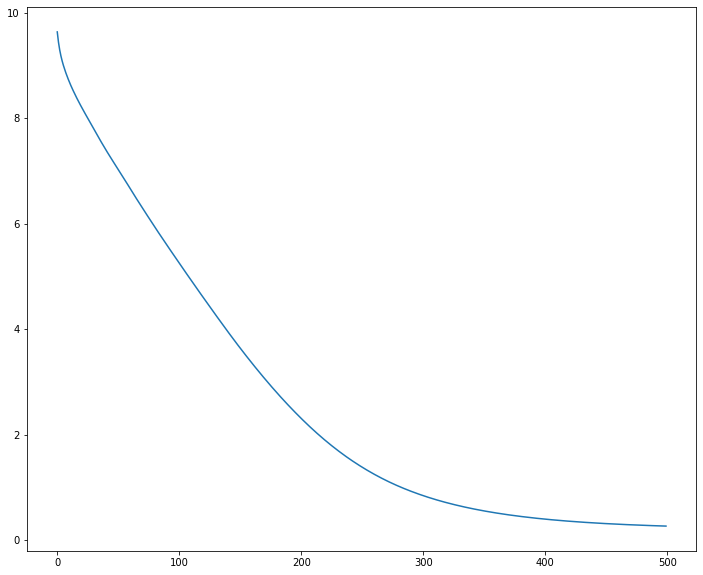

In [53]:
plt.figure(figsize=(12, 10))
plt.plot(range(len(losses2)), losses2)
plt.show()